# Part 2: Spatial Interaction models

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. preparing data

In [199]:
london = pd.read_csv('London_underground_nointra.csv')
london.sample(10)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new
9565,Cannon Street,Paddington,53,3874,20198,8005.152526,3874.0,20198.0,8005.152526
43558,Royal Albert,Abbey Road,1,650,345,5237.762991,650.0,345.0,5237.762991
28389,Kensal Rise,Shadwell,1,1941,7447,15156.542970,1941.0,7447.0,15156.542970
46174,South Harrow,Clapham Common,1,1516,2020,25838.854150,1516.0,2020.0,25838.854150
15778,East Putney,Knightsbridge,55,5448,6821,7227.787351,5448.0,6821.0,7227.787351
25243,Highbury & Islington,Chorleywood,0,23714,702,35008.446080,23714.0,702.0,35008.446080
52741,Tower Hill,Woodford,4,8501,706,15198.118760,8501.0,706.0,15198.118760
40055,Piccadilly Circus,Brent Cross,0,1037,450,11209.960920,1037.0,450.0,11209.960920
16296,Edgware Road,Epping,0,2841,498,34156.793720,2841.0,498.0,34156.793720
31282,Latimer Road,Edgware Road,27,861,6868,4237.895563,861.0,6868.0,4237.895563


## 2. unconstrained model

### 2.1 estimating parameters

In [73]:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(london["flows"])

In [74]:
Oi1_alpha = london["population_new"]**alpha
Dj2_gamma = london["jobs_new"]**gamma
dist_beta = london["distance_new"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [75]:
#run the model and store of the new flow estimates in a new column
london["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
london["unconstrainedEst1"] = london["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(london["unconstrainedEst1"])

1539032

In [76]:
london_1 = london.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_1

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,564
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,54
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,2.0,0.0,NaN,2.0,...,1.0,0.0,0.0,2.0,NaN,0.0,NaN,0.0,NaN,615
Aldgate,NaN,NaN,0.0,NaN,150.0,NaN,NaN,0.0,NaN,25.0,...,1.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,NaN,10004
Aldgate East,NaN,NaN,0.0,162.0,NaN,NaN,0.0,0.0,NaN,24.0,...,1.0,0.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,8109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,3.0,NaN,NaN,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,333
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,2.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,212


In [77]:
london_0 = london.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_0

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [78]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(london["flows"], london["unconstrainedEst1"])

0.03475534942068005

In [79]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(london["flows"], london["unconstrainedEst1"])

485.646

### 2.2 calibrating parameters

#### (a) inverse power

In [80]:
#take the variables and produce logarithms of them
x_variables = ["population_new", "jobs_new", "distance_new"]
log_x_vars = []
for x in x_variables:
    london[f"log_{x}"] = np.log(london[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population_new + log_jobs_new + log_distance_new'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=london, 
                  family=sm.families.Poisson()).fit()

In [81]:
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2789e+06
Date:                Sun, 01 May 2022   Deviance:                   2.3856e+06
Time:                        18:26:08   Pearson chi2:                 4.77e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.7588      0

In [82]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

In [83]:
#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
london["unconstrainedEst2"] = np.exp(K 
                                       + alpha*london["population_new"] 
                                       + gamma*london["jobs_new"] 
                                       - beta*london["distance_new"])

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [84]:
#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
london["unconstrainedEst2"] = predictions_summary_frame["mean"]

In [85]:
uncosim.mu

array([49.62633181,  0.93509559,  2.11632207, ...,  5.34174114,
       14.09863813, 12.37894772])

In [86]:
london["unconstrainedEst2"]

0        49.626332
1         0.935096
2         2.116322
3        53.288459
4        32.172329
           ...    
61451    21.753543
61452    41.513320
61453     5.341741
61454    14.098638
61455    12.378948
Name: unconstrainedEst2, Length: 61456, dtype: float64

In [87]:
#round the numbers so that we don't get a half of a person
london["unconstrainedEst2"] = round(london["unconstrainedEst2"], 0)
#convert to integers
london["unconstrainedEst2"] = london["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(london["unconstrainedEst2"])

1542365

In [88]:
#turn it into a little matrix and have a look at your handy work
london2 = london.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,392
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,332
Acton Town,NaN,NaN,NaN,21.0,21.0,NaN,7.0,1.0,NaN,22.0,...,18.0,3.0,6.0,11.0,NaN,2.0,NaN,3.0,NaN,3855
Aldgate,NaN,NaN,7.0,NaN,81.0,NaN,NaN,1.0,NaN,47.0,...,14.0,NaN,8.0,6.0,NaN,3.0,NaN,3.0,NaN,6102
Aldgate East,NaN,NaN,7.0,85.0,NaN,NaN,3.0,1.0,NaN,48.0,...,14.0,3.0,8.0,7.0,NaN,3.0,NaN,3.0,NaN,6468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,26.0,28.0,NaN,NaN,NaN,NaN,25.0,...,14.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3709
Woodgrange Park,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
Woodside Park,NaN,NaN,5.0,18.0,18.0,NaN,2.0,NaN,NaN,21.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2646


In [89]:
CalcRSqaured(london["flows"], london["unconstrainedEst2"])

0.32146271849067265

In [90]:
CalcRMSE(london["flows"], london["unconstrainedEst2"])

108.277

#### (b) negative exponential

In [200]:
#create the formula
formula1 = 'flows ~ population_new + jobs_new + distance_new' 

#run the regression
uncosim_expo = smf.glm(formula = formula1, 
                  data=london, 
                  family=sm.families.Poisson()).fit()

In [201]:
#get the predictions
predictions2 = uncosim_expo.get_prediction()
predictions_summary_frame2 = predictions2.summary_frame()
london["uncosim_expo"] = round(predictions_summary_frame2["mean"],0)

In [208]:
print(uncosim_expo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61456
Model:                            GLM   Df Residuals:                    61452
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4959e+06
Date:                Mon, 02 May 2022   Deviance:                   2.8196e+06
Time:                        15:49:29   Pearson chi2:                 5.37e+06
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6611      0.002   2026.

In [209]:
K = uncosim_expo.params[0]
alpha = uncosim_expo.params[1]
gamma = uncosim_expo.params[2]
beta = -uncosim_expo.params[3]

In [210]:
beta

0.00010817390671517748

In [44]:
CalcRSqaured(london["flows"],london["uncosim_expo"])

0.4090416325021033

In [45]:
CalcRMSE(london["flows"],london["uncosim_expo"])

101.519

## 3. production constrained model

following three code blocks were completed in R.

In [91]:
london = pd.read_csv('london_r.csv')
london.head(10)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,599,78549,0.0,55
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,599,442,0.0,1
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,599,665,0.0,3
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,599,58772,0.0,67
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,599,15428,0.0,49
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6686.475560,599,1208,0.0,3
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,3824.855630,599,845,0.0,3
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,8503.898909,599,1748,0.0,3
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6532.099618,599,850,0.0,2
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,3958.324171,599,611,0.0,2


In [94]:
london3 = london.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,600
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3750
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2881
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091


In [96]:
london0 = london.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london0

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [92]:
CalcRSqaured(london["flows"],london["prodsimest1"])

0.3886317350807768

In [93]:
CalcRMSE(londonr["flows"],londonr["prodsimest1"])

102.826

### Scenario A: Canary Wharf has a 50% decrease in jobs after Brexit

In [97]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = round(row["jobs_new"]*0.5,0)
    else:
        val = row["jobs_new"]
    return val
        
london["Dj1_destjobScenario"] = london.apply(new_job, axis =1)
london.head(10)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,O_i,D_j,alpha_i,prodsimest1,Dj1_destjobScenario
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,599,78549,0.0,55,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,599,442,0.0,1,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,599,665,0.0,3,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,599.0,58772.0,5086.514220,599,58772,0.0,67,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,599.0,15428.0,2228.923167,599,15428,0.0,49,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,599.0,1208.0,6686.475560,599,1208,0.0,3,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,599.0,845.0,3824.855630,599,845,0.0,3,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,599.0,1748.0,8503.898909,599,1748,0.0,3,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,599.0,850.0,6532.099618,599,850,0.0,2,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,599.0,611.0,3958.324171,599,611,0.0,2,611.0


In [98]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61456 entries, 0 to 61455
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61456 non-null  object 
 1   station_destination  61456 non-null  object 
 2   flows                61456 non-null  int64  
 3   population           61456 non-null  int64  
 4   jobs                 61456 non-null  int64  
 5   distance             61456 non-null  float64
 6   population_new       61456 non-null  float64
 7   jobs_new             61456 non-null  float64
 8   distance_new         61456 non-null  float64
 9   O_i                  61456 non-null  int64  
 10  D_j                  61456 non-null  int64  
 11  alpha_i              61456 non-null  float64
 12  prodsimest1          61456 non-null  int64  
 13  Dj1_destjobScenario  61456 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 6.6+ MB


In [113]:
#got from R
k = 3.24223651
gamma = 0.76901618
beta = 0.87758433

In [114]:
london["prodsimest2"] = np.exp(london["alpha_i"]+gamma*np.log(london["Dj1_destjobScenario"]) - beta*np.log(london["distance_new"]))

london["prodsimest2"] = round(london["prodsimest2"],0)

In [115]:
london4 = london.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,41.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,0.0,0.0,NaN,1.0,...,1.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,129.0
Aldgate,NaN,NaN,0.0,NaN,2.0,NaN,NaN,0.0,NaN,1.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,95.0
Aldgate East,NaN,NaN,0.0,2.0,NaN,NaN,0.0,0.0,NaN,1.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,1.0,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,175.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,1.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0


In [124]:
london5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3750.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2881.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [118]:
Dj1_gamma = london["jobs_new"]**gamma
dist_beta = london["distance_new"]**-beta
#calcualte the first stage of the Ai values
london["Ai1"] = Dj1_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
london = london.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [119]:
#to check everything works, recreate the original estimates
london["prodsimest3"] = london["A_i"]*london["O_i"]*Dj1_gamma*dist_beta
#round
london["prodsimest3"] = round(london["prodsimest3"])
#check
london[["prodsimest1","prodsimest2", "prodsimest3"]]

,prodsimest1,prodsimest2,prodsimest3
0,55,2.0,55.0
1,1,0.0,1.0
2,3,0.0,3.0
3,67,2.0,67.0
4,49,2.0,49.0
...,...,...,...
61451,121,5.0,121.0
61452,259,10.0,259.0
61453,32,1.0,32.0
61454,98,4.0,98.0


In [121]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = london["Dj1_destjobScenario"]**gamma
#calcualte the first stage of the Ai values
london["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
london = london.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [122]:
#to check everything works, recreate the original estimates
london["prodsimest4"] = london["A_i2"]*london["O_i"]*Dj3_gamma*dist_beta
#round
london["prodsimest4"] = round(london["prodsimest4"])

In [125]:
london6 = london.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3744.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2885.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3089.0


In [126]:
london.to_csv('scenarioA.csv', index=False)  

## 4. double constrained model

Following code blocks were completed in R.

In [130]:
london_d = pd.read_csv('london_r.csv')
london_d.head(3)

,station_origin,station_destination,flows,population,jobs,distance,population_new,jobs_new,distance_new,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,599.0,78549.0,8131.525097,599,78549,0.0,55
1,Abbey Road,Beckton,1,599,442,8510.121774,599.0,442.0,8510.121774,599,442,0.0,1
2,Abbey Road,Blackwall,3,599,665,3775.448872,599.0,665.0,3775.448872,599,665,0.0,3


In [129]:
london_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61456 entries, 0 to 61455
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   station_origin       61456 non-null  object 
 1   station_destination  61456 non-null  object 
 2   flows                61456 non-null  int64  
 3   population           61456 non-null  int64  
 4   jobs                 61456 non-null  int64  
 5   distance             61456 non-null  float64
 6   population_new       61456 non-null  float64
 7   jobs_new             61456 non-null  float64
 8   distance_new         61456 non-null  float64
 9   doubsimFitted        61456 non-null  int64  
 10  doubsimFitted1       61456 non-null  int64  
 11  O_i                  61456 non-null  int64  
 12  D_j                  61456 non-null  int64  
 13  beta                 61456 non-null  float64
 14  Ai                   61456 non-null  float64
 15  Bj                   61456 non-null 

### Scenario B: a significant increase in the cost of transport

### inverse power

#### B(1). beta_1 = 2

In [131]:
# Here is the entropy maximising approach for a known beta.
# Plug in the required values in this function to solve.

def balance_doubly_constrained(pd, orig_field, dest_field, Oi_field, Dj_field, cij_field, beta, 
                               cost_function, Ai_name = "Ai_new", Bj_name = "Bj_new", converge=0.001):
    # Define some variables
    Oi = pd[[orig_field, Oi_field]]
    Dj = pd[[dest_field,Dj_field]]    
    if cost_function.lower() in ['power','pow']:
        beta_cij = np.exp(beta * np.log(pd[cij_field]))
    elif cost_function.lower() in ['exponential','exp']:
        beta_cij = np.exp(beta * pd[cij_field])
    else:
        return "Cost function not specified properly, use 'exp' or 'pow'"
    
    # Create some helper variables
    cnvg = 1
    iteration = 0
    # Now iteratively rebalance the Ai and Bj terms until convergence
    while cnvg > converge:
        if iteration == 0:
            # This first condition sets starting values for Ai and Bj
            # NB sets starting value of Ai assuming Bj is a vector of 1s.
            # We've already established beta_cij with the appropriate cost function, so...
            Oi = Oi.assign(Ai = Dj[Dj_field] * beta_cij)
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Now set up Bjs using starting values of Ai
            Dj = Dj.assign(Bj = Oi['Ai_old'] * Oi[Oi_field] * beta_cij)
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True, suffixes = ('','_old'))
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Increment loop
            iteration += 1
        else:
            # This bit is the iterated bit of the loop which refines the values of Ai and Bj
            # First Ai
            Oi['Ai'] = Dj['Bj_old'] * Dj[Dj_field] * beta_cij
            # Aggregate Ai and take inverse
            Ai = 1.0/Oi.groupby(orig_field)['Ai'].sum().to_frame()
            # Drop temporary Ai
            Oi.drop('Ai', axis=1, inplace=True)
            # Merge new Ais 
            Oi = Oi.merge(Ai,left_on = orig_field, right_index = True)
            # Calculate the difference between old and new Ais
            Oi['diff'] = np.absolute((Oi['Ai_old'] - Oi['Ai'])/Oi['Ai_old'])
            # Set new Ais to Ai_old
            Oi['Ai_old'] = Oi['Ai']
            # Drop the temporary Ai field we created, leaving Ai_old
            Oi.drop('Ai', axis=1, inplace=True)
            
            # Then Bj
            Dj['Bj'] = Oi['Ai_old'] * Oi[Oi_field] * beta_cij
            # Aggregate Bj and take inverse
            Bj = 1.0/Dj.groupby(dest_field)['Bj'].sum().to_frame()
            # Drop temporary Bj
            Dj.drop('Bj', axis=1, inplace=True)
            # Merge new Bjs
            Dj = Dj.merge(Bj,left_on = dest_field, right_index = True)
            # Calculate the difference between old and new Bjs
            Dj['diff'] = np.absolute((Dj['Bj_old'] - Dj['Bj'])/Dj['Bj_old'])
            # Set new Bjs to Bj_old
            Dj['Bj_old'] = Dj['Bj']
            # Drop the temporary Bj field we created, leaving Bj_old
            Dj.drop('Bj', axis=1, inplace=True)
            
            # Assign higher sum difference from Ai or Bj to cnvg
            cnvg = np.maximum(Oi['diff'].sum(),Dj['diff'].sum())
            
            # Print and increment loop
            print("Iteration:", iteration)
            iteration += 1

    # When the while loop finishes add the computed Ai_old and Bj_old to the dataframe and return
    pd[Ai_name] = Oi['Ai_old']
    pd[Bj_name] = Dj['Bj_old']
    return pd

In [132]:
beta = 2
# Get the balancing factors.
london_d = balance_doubly_constrained(london_d,'station_origin','station_destination','O_i','D_j','distance_new',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
london_d['SIM_est_pow'] = np.round(london_d['O_i'] * london_d['Ai_new'] * london_d['D_j'] * london_d['Bj_new'] * 
                                   np.exp(np.log(london_d['distance_new'])*-beta))
# Check out the matrix
pd.pivot_table(london_d,values='SIM_est_pow',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33


station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,601.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1221.0
Acton Town,0,0,0,7,7,0,18,0,0,10,...,29,1,1,13,0,0,0,0,0,3739.0
Aldgate,0,0,0,0,53,0,0,0,0,11,...,1,0,0,0,0,0,0,0,0,2870.0
Aldgate East,0,0,0,78,0,0,0,0,0,14,...,2,0,0,0,0,0,0,0,0,3162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,3,31,37,0,0,0,0,30,...,24,0,4,0,0,0,0,0,0,4869.0
Woodgrange Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,533.0
Woodside Park,0,0,2,14,13,0,1,0,0,24,...,18,0,2,0,0,0,0,0,0,3092.0


#### B(2). beta_2 = 10

In [133]:
beta = 10
# Get the balancing factors.
london_d = balance_doubly_constrained(london_d,'station_origin','station_destination','O_i','D_j','distance_new',-beta,'power')

# Now predict the model again using the new Ai and Dj fields.
london_d['SIM_est_pow1'] = np.round(london_d['O_i'] * london_d['Ai_new'] * london_d['D_j'] * london_d['Bj_new'] * 
                                   np.exp(np.log(london_d['distance_new'])*-beta))
# Check out the matrix
pd.pivot_table(london_d,values='SIM_est_pow1',index ='station_origin',columns='station_destination',fill_value=0,aggfunc=sum,margins=True)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,599.0
Acton Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1224.0
Acton Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3741.0
Aldgate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2886.0
Aldgate East,0,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,0,0,0,33,8,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,4866.0
Woodgrange Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,530.0
Woodside Park,0,0,0,2,0,0,0,0,0,49,...,0,0,0,0,0,0,0,0,0,3092.0


In [137]:
london_d.to_csv('scenarioB.csv', index=False)  

## 5. the change in flows obtained for the 3 different scenarios

In [148]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [151]:
change = pd.read_csv('flow_change.csv')
change.head(3)

,station_origin,station_destination,flow_changeA,flow_changeB1,flow_changeB2
0,Waterloo,Bank and Monument,-12299,-12037,-15349
1,Waterloo,Canary Wharf,-7417,-7647,-8085
2,London Bridge,Canary Wharf,-5753,-5866,-6165


In [184]:
flow_change=change[["flow_changeA","flow_changeB1","flow_changeB2"]]
flow_change.head(10)

,flow_changeA,flow_changeB1,flow_changeB2
0,-12299,-12037,-15349
1,-7417,-7647,-8085
2,-5753,-5866,-6165
3,-4809,-4374,1158
4,-3501,-2253,-4969
5,-2976,256,1360
6,-2742,-2378,-3741
7,-2424,582,1005
8,-2379,741,15091
9,-2280,-1641,4384


In [154]:
flow_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61456 entries, 0 to 61455
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   flow_changeA   61456 non-null  int64
 1   flow_changeB1  61456 non-null  int64
 2   flow_changeB2  61456 non-null  int64
dtypes: int64(3)
memory usage: 1.4 MB


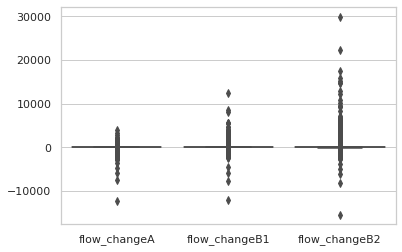

In [197]:
ax = sns.boxplot(data=flow_change)
plt.savefig('output.png')

In [188]:
summary=flow_change.describe(include='all') 
summary

,flow_changeA,flow_changeB1,flow_changeB2
count,61456.000000,61456.000000,61456.000000
mean,-0.004979,-0.024099,-0.006850
std,104.044000,149.889702,325.411649
min,-12299.000000,-12037.000000,-15349.000000
25%,0.000000,-3.000000,-10.000000
50%,2.000000,0.000000,-2.000000
75%,7.000000,2.000000,0.000000
max,4036.000000,12351.000000,29883.000000


In [196]:
summary.to_csv('sim_smr.csv', index=True) 